![Patrones](https://drive.google.com/uc?export=view&id=1FVBEDeOK1dmp3cpfhbq82lA-eI0ZZJW1)

## **`Challenge 5 `**
    

Con el objetivo de buscar potenciales fármacos contra el cáncer dentro de la base de datos ¿Cuál es el mejor agrupamiento de las moléculas disponibilizadas?



1. Emplea modelos no supervisados (Kmeans, DBSCAN, PCA, etc) y figuras (elbow plot, diagrama de silhouette) según convenga.

2. ¿Cuántas dimensiones son requeridas para preservar el 95% de la varianza?

3. ¿Cómo usarías KMeans para reducir la dimensionalidad?



In [107]:
# Importando librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Carga el archivo CSV en un DataFrame de pandas
df = pd.read_csv('UML_2024.csv')

# Muestra las primeras filas del DataFrame para verificar que se haya cargado correctamente
df.head()

,cid,Molecular_weight,LogP,Number_of_HBA_1,Number_of_HBA_2,Number_of_HBD_1,Number_of_HBD_2,Number_of_acidic_groups,Number_of_aliphatic_OH_groups,Number_of_basic_groups,...,Number_of_OSO_groups,Number_of_SO2_groups,PolarSurfaceArea,Geometrical_diameter,Geometrical_radius,Geometrical_shape_coefficient,Kier_shape_1,Kier_shape_2,Zagreb_group_index_1,Zagreb_group_index_2
0,1046,123.114998,1.0732,9,4,1,0,0,0,0,...,0,0,68.87,7.031056,1.007808,5.976582,7.111111,3.239669,63,63
1,124704,165.155998,1.5166,13,6,2,0,0,0,2,...,0,0,107.25,9.169663,1.003795,8.134998,10.083333,4.888889,85,84
2,171646,265.053997,-1.7651,11,3,1,0,1,0,0,...,0,0,59.86,7.029373,0.161433,42.543630,11.000000,4.792899,84,81
3,171647,138.149998,1.2309,11,3,1,0,0,0,0,...,0,0,59.86,7.067147,1.006808,6.019361,8.100000,3.408284,84,81
4,181450,157.559997,1.6036,8,4,1,0,0,0,0,...,0,0,68.87,7.646398,1.007958,6.586025,8.100000,3.408284,64,66


## **Análisis de Datos**

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cid                            300 non-null    int64  
 1   Molecular_weight               300 non-null    float64
 2   LogP                           300 non-null    float64
 3   Number_of_HBA_1                300 non-null    int64  
 4   Number_of_HBA_2                300 non-null    int64  
 5   Number_of_HBD_1                300 non-null    int64  
 6   Number_of_HBD_2                300 non-null    int64  
 7   Number_of_acidic_groups        300 non-null    int64  
 8   Number_of_aliphatic_OH_groups  300 non-null    int64  
 9   Number_of_basic_groups         300 non-null    int64  
 10  Fraction_of_rotatable_bonds    300 non-null    float64
 11  Number_of_heavy_bonds          300 non-null    int64  
 12  Number_of_heterocycles         300 non-null    int

In [109]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cid,300.0,3.601528e+07,4.067521e+07,1046.000000,5.281500e+06,1.388871e+07,6.880700e+07,1.560257e+08
Molecular_weight,300.0,3.348073e+02,1.429548e+02,122.115432,1.858750e+02,3.523860e+02,4.567110e+02,9.176300e+02
LogP,300.0,7.927830e+00,6.127177e+00,-1.765100,2.399200e+00,6.627100e+00,1.357108e+01,4.037570e+01
Number_of_HBA_1,300.0,3.013333e+01,1.827280e+01,7.000000,1.300000e+01,2.700000e+01,4.800000e+01,1.180000e+02
Number_of_HBA_2,300.0,4.460000e+00,1.224772e+00,2.000000,4.000000e+00,4.000000e+00,5.000000e+00,9.000000e+00
Number_of_HBD_1,300.0,1.433333e+00,8.648983e-01,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00
Number_of_HBD_2,300.0,1.493333e+00,1.169551e+00,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00
Number_of_acidic_groups,300.0,3.233333e-01,5.225250e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
Number_of_aliphatic_OH_groups,300.0,5.533333e-01,9.255689e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00
Number_of_basic_groups,300.0,4.333333e-02,2.858811e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00


## **Pre-procesamiento**

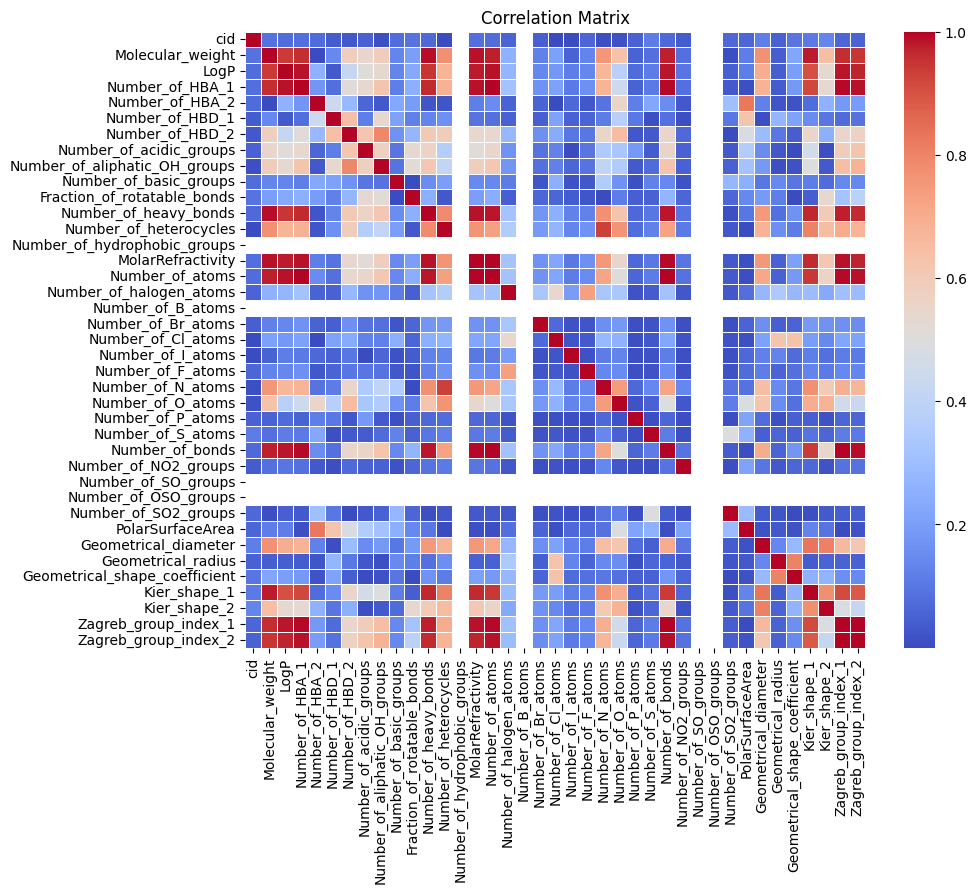

In [110]:
correlation_matrix = df.corr().abs()
# Visualizar la matriz de correlación en un diagrama de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

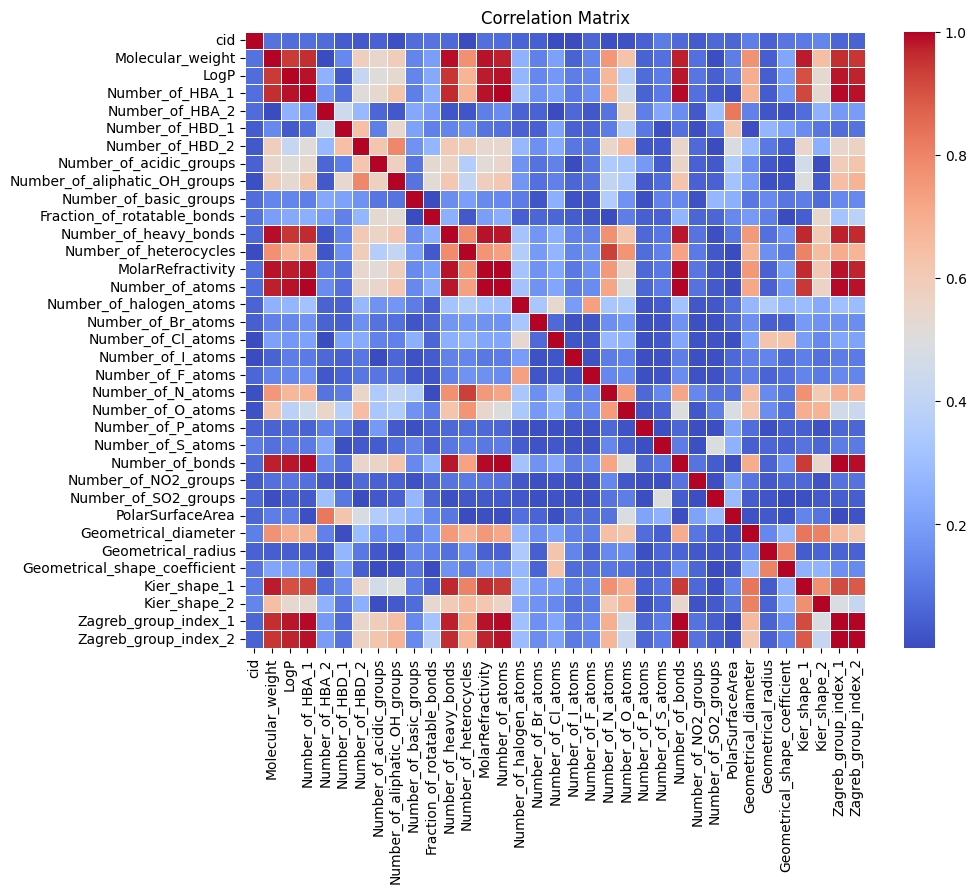

In [111]:
# Como se puede ver, hay atributos que no tienen información en el dataframe, por lo que se proceden a eliminar
delete = ['Number_of_hydrophobic_groups','Number_of_B_atoms','Number_of_SO_groups','Number_of_OSO_groups']
# Elimina las columnas especificadas del DataFrame
df = df.drop(delete, axis=1)

correlation_matrix = df.corr().abs()
# Visualizar la matriz de correlación en un diagrama de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Se conservarán los atributos con correlación cercana a 1, así como la varianza inherente a cada atributo.

In [112]:
# Extraer la primera fila como etiquetas para facilitar el manejo de gráficos:
columns = df.columns.tolist()
print(columns)

['cid', 'Molecular_weight', 'LogP', 'Number_of_HBA_1', 'Number_of_HBA_2', 'Number_of_HBD_1', 'Number_of_HBD_2', 'Number_of_acidic_groups', 'Number_of_aliphatic_OH_groups', 'Number_of_basic_groups', 'Fraction_of_rotatable_bonds', 'Number_of_heavy_bonds', 'Number_of_heterocycles', 'MolarRefractivity', 'Number_of_atoms', 'Number_of_halogen_atoms', 'Number_of_Br_atoms', 'Number_of_Cl_atoms', 'Number_of_I_atoms', 'Number_of_F_atoms', 'Number_of_N_atoms', 'Number_of_O_atoms', 'Number_of_P_atoms', 'Number_of_S_atoms', 'Number_of_bonds', 'Number_of_NO2_groups', 'Number_of_SO2_groups', 'PolarSurfaceArea', 'Geometrical_diameter', 'Geometrical_radius', 'Geometrical_shape_coefficient', 'Kier_shape_1', 'Kier_shape_2', 'Zagreb_group_index_1', 'Zagreb_group_index_2']


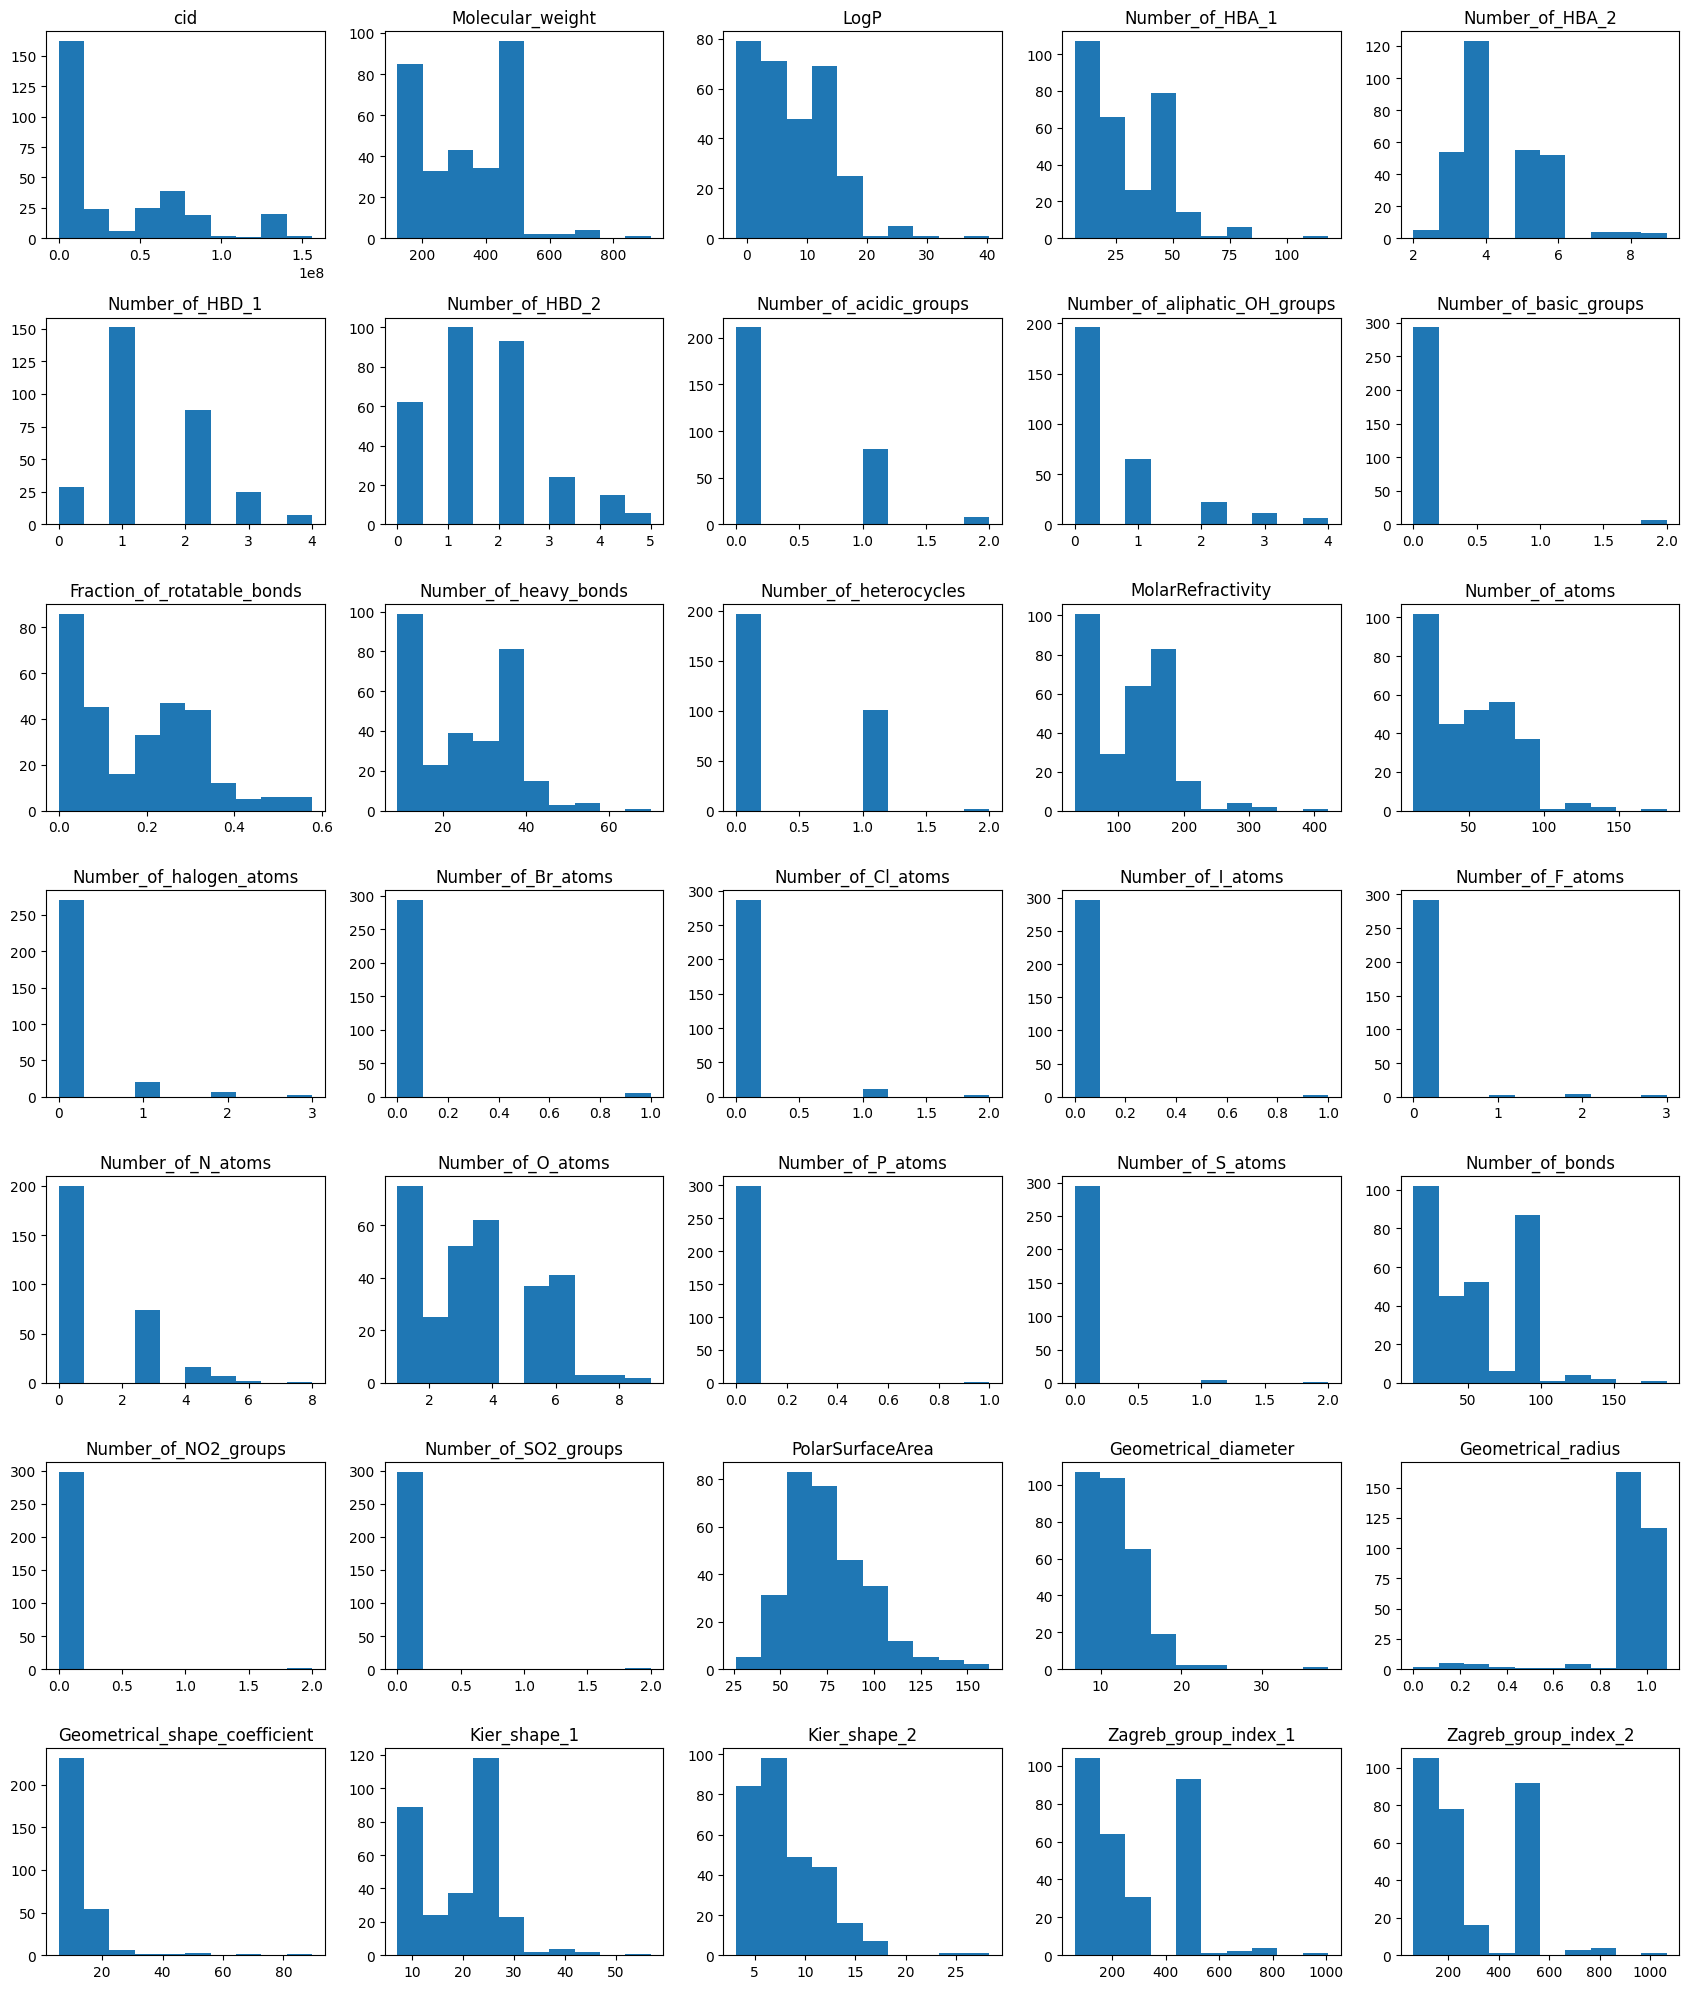

In [113]:
# Ploteo de un histograma para cada una de las características
plt.figure(figsize=(17,20))
count = 1
for i in columns:
    plt.subplot(7, 5, count)
    plt.hist(df[i], bins=10)
    plt.title((i))
    # plt.grid()
    count += 1

plt.tight_layout()
plt.show()

Como se puede ver, hay varios atributos que tienen un único valor predominante, lo cual no aporta al entrenamiento al estar demasiado desbalanceados.

In [114]:
# Eliminamos las columnas que tienen más del 90% de sus datos como el mismo valor:
# Calcula el número total de filas
num_filas_total = len(df)

# Calcula el umbral del 90%
umbral = 0.9 * num_filas_total

# Itera sobre todas las columnas del DataFrame
for columna in df.columns:
    # Calcula la cuenta del valor más común en la columna actual
    valor_mas_comun_count = df[columna].value_counts().iloc[0]

    # Si la cuenta del valor más común supera el umbral, elimina la columna
    if valor_mas_comun_count > umbral:
        del df[columna]


In [115]:
# Extraer la primera fila como etiquetas para facilitar el manejo de gráficos:
columns = df.columns.tolist()
print(columns)

['cid', 'Molecular_weight', 'LogP', 'Number_of_HBA_1', 'Number_of_HBA_2', 'Number_of_HBD_1', 'Number_of_HBD_2', 'Number_of_acidic_groups', 'Number_of_aliphatic_OH_groups', 'Fraction_of_rotatable_bonds', 'Number_of_heavy_bonds', 'Number_of_heterocycles', 'MolarRefractivity', 'Number_of_atoms', 'Number_of_N_atoms', 'Number_of_O_atoms', 'Number_of_bonds', 'PolarSurfaceArea', 'Geometrical_diameter', 'Geometrical_radius', 'Geometrical_shape_coefficient', 'Kier_shape_1', 'Kier_shape_2', 'Zagreb_group_index_1', 'Zagreb_group_index_2']


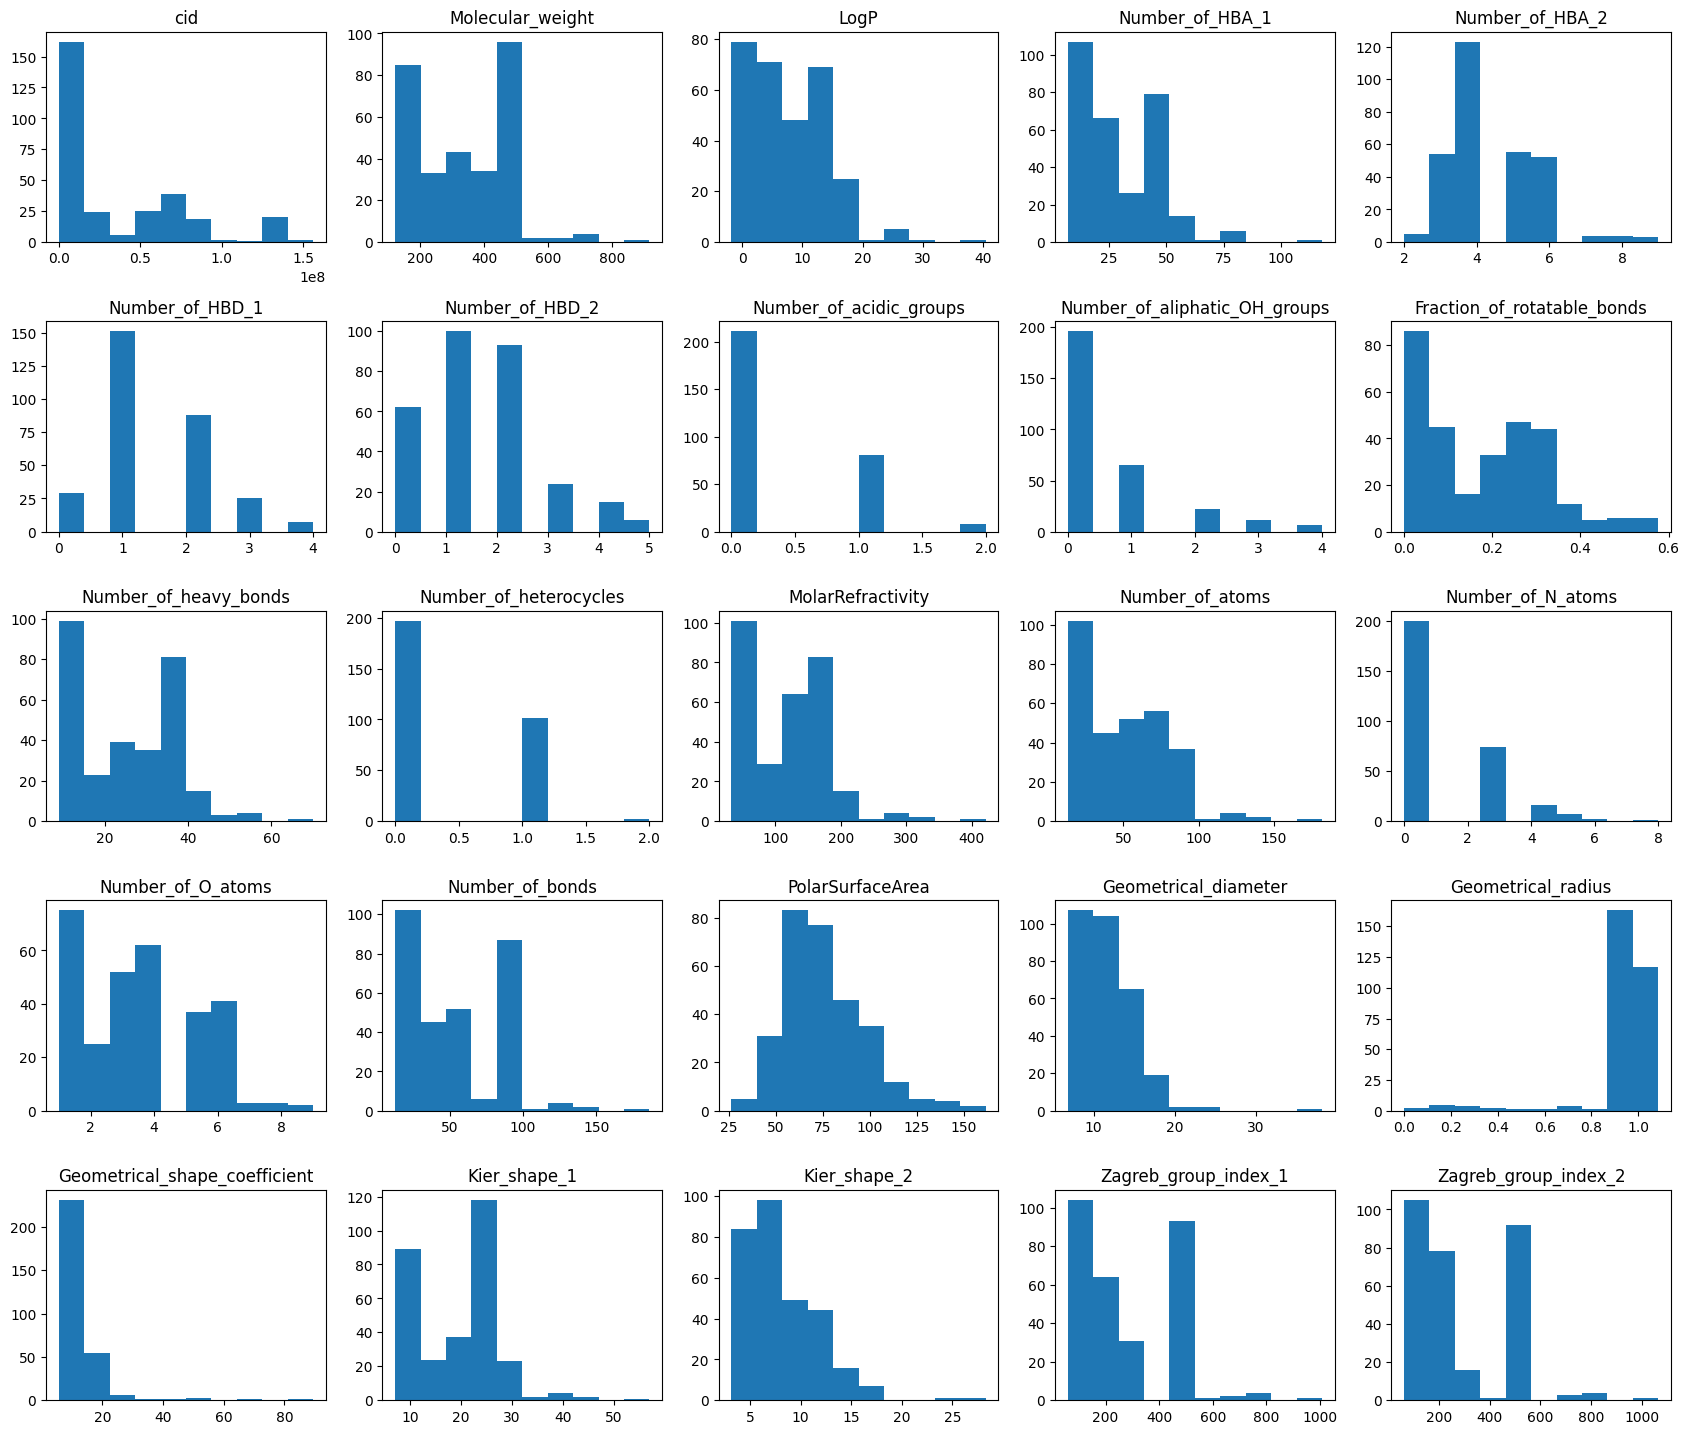

In [116]:
# Ploteo de un histograma para cada una de las características
plt.figure(figsize=(17,20))
count = 1
for i in columns:
    plt.subplot(7, 5, count)
    plt.hist(df[i], bins=10)
    plt.title((i))
    # plt.grid()
    count += 1

plt.tight_layout()
plt.show()

## **1. Emplea modelos no supervisados (Kmeans, DBSCAN, PCA, etc) y figuras (elbow plot, diagrama de silhouette) según convenga**

In [117]:
df = df.drop(columns=['cid'])
df.head()

,Molecular_weight,LogP,Number_of_HBA_1,Number_of_HBA_2,Number_of_HBD_1,Number_of_HBD_2,Number_of_acidic_groups,Number_of_aliphatic_OH_groups,Fraction_of_rotatable_bonds,Number_of_heavy_bonds,...,Number_of_O_atoms,Number_of_bonds,PolarSurfaceArea,Geometrical_diameter,Geometrical_radius,Geometrical_shape_coefficient,Kier_shape_1,Kier_shape_2,Zagreb_group_index_1,Zagreb_group_index_2
0,123.114998,1.0732,9,4,1,0,0,0,0.111111,9,...,1,14,68.87,7.031056,1.007808,5.976582,7.111111,3.239669,63,63
1,165.155998,1.5166,13,6,2,0,0,0,0.166667,12,...,1,19,107.25,9.169663,1.003795,8.134998,10.083333,4.888889,85,84
2,265.053997,-1.7651,11,3,1,0,1,0,0.100000,10,...,1,18,59.86,7.029373,0.161433,42.543630,11.000000,4.792899,84,81
3,138.149998,1.2309,11,3,1,0,0,0,0.100000,10,...,1,18,59.86,7.067147,1.006808,6.019361,8.100000,3.408284,84,81
4,157.559997,1.6036,8,4,1,0,0,0,0.100000,10,...,1,14,68.87,7.646398,1.007958,6.586025,8.100000,3.408284,64,66


In [118]:
# Elimina las filas que contienen valores NaN
df = df.dropna()

### **Aplicamos PCA**

Utiliza el análisis de componentes principales (PCA) para reducir la dimensionalidad de los datos a solo 2 componentes. Esto se hace para poder visualizar los datos en un espacio bidimensional.

In [120]:
from sklearn.preprocessing import StandardScaler
columnas_numericas = df.select_dtypes(include=['float64', 'int64'])

# Escala las características
scaler = StandardScaler()
columnas_numericas_escaladas = scaler.fit_transform(columnas_numericas)

# Crea un nuevo DataFrame con las características escaladas
df1 = pd.DataFrame(columnas_numericas_escaladas, columns=columnas_numericas.columns)


In [121]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Aplicamos PCA para reducir la dimensionalidad a 2 componentes
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

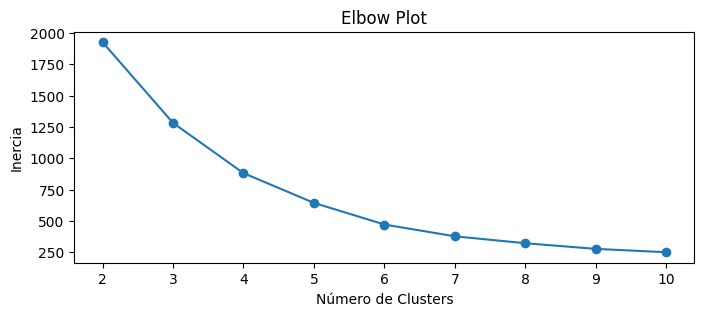

In [122]:
# Creamos una lista para almacenar los valores de inercia
inercia = []

# Probamos diferentes números de clusters
for i in range(2, 11):
    # Creamos el modelo KMeans
    kmeans = KMeans(n_clusters=i, random_state=42)

    # Ajustamos el modelo a los datos PCA
    kmeans.fit(df_pca)

    # Calculamos la inercia y la agregamos a la lista
    inercia.append(kmeans.inertia_)

# Graficamos el elbow plot
plt.figure(figsize=(8,3))
plt.plot(range(2, 11), inercia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Elbow Plot')
plt.show()

Se calcula la inercia para diferentes números de clusters (desde 2 hasta 10) utilizando el algoritmo KMeans. Graficamos estos valores de inercia en función del número de clusters. El "codo" en el gráfico representa el punto donde la tasa de cambio de la inercia comienza a disminuir, lo que sugiere el número óptimo de clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

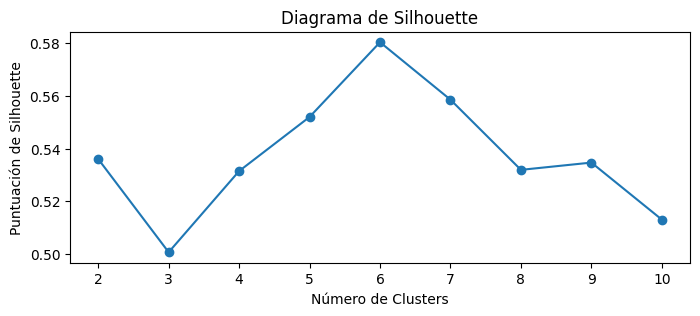

In [123]:
# Calculamos el coeficiente de silhouette para diferentes números de clusters
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(df_pca)
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Graficamos el diagrama de silhouette
plt.figure(figsize=(8,3))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Puntuación de Silhouette')
plt.title('Diagrama de Silhouette')
plt.show()

Se calcula el coeficiente de silhouette para diferentes números de clusters (también desde 2 hasta 10) utilizando el algoritmo KMeans. El coeficiente de silhouette mide cuán similares son los puntos en un cluster entre sí, en comparación con otros clusters. Graficamos estos coeficientes de silhouette en función del número de clusters. Valores más cercanos a 1 indican una buena separación entre clusters.

## **2. ¿Cuántas dimensiones son requeridas para preservar el 95% de la varianza?**

In [124]:
# Creamos un objeto PCA
pca = PCA()

# Aplicamos PCA a nuestros datos
pca.fit(df1)

# Calculamos el número de componentes necesarios para preservar el 95% de la varianza
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)
num_componentes_95_varianza = np.argmax(varianza_acumulada >= 0.95) + 1

print("Número de dimensiones requeridas para preservar el 95% de la varianza:", num_componentes_95_varianza)


Número de dimensiones requeridas para preservar el 95% de la varianza: 6


## **3. ¿Cómo usarías KMeans para reducir la dimensionalidad?**


Para reducir la dimensionalidad utilizando KMeans, primero aplicaría el algoritmo para agrupar los datos en un número definido de clusters. Una vez agrupados, calcularía los centroides de los clusters. Luego, en lugar de utilizar los datos originales, representaría cada instancia por su distancia a los centroides de los clusters. Esta representación reduciría efectivamente la dimensionalidad de los datos al número de clusters especificado, lo que podría ayudar a simplificar el análisis y reducir la complejidad computacional.